In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from seaborn import heatmap

In [2]:
%matplotlib inline

In [3]:
df = pd.read_pickle('../PklJar/dfTidesDaily.pkl')

In [4]:
df.head()

,Pred_min,ampDiff_min,vel_min,move_min,Pred_max,ampDiff_max,vel_max,move_max,Pred_std,ampDiff_std,vel_std,move_std,Pred_med,ampDiff_med,vel_med,move_med
Date_Time,,,,,,,,,,,,,,,,
1999-01-01,-0.46,-3.90,-0.607792,3.47,3.44,3.58,0.569761,3.90,2.046890,4.287179,0.675697,0.223383,1.435,3.470,0.555200,3.580
1999-01-02,-0.47,-3.91,-0.610938,3.15,3.44,3.58,0.569761,3.91,2.050024,4.088088,0.654427,0.312943,1.435,0.165,0.012217,3.530
1999-01-03,-0.44,-3.85,-0.604712,3.14,3.41,3.54,0.563395,3.85,2.138933,4.077144,0.653703,0.355949,-0.130,-3.140,-0.529213,3.540
1999-01-04,-0.36,-3.69,-0.579581,3.09,3.33,3.44,0.547480,3.69,1.964943,3.945149,0.633691,0.246171,1.455,0.165,0.012479,3.430
1999-01-05,-0.25,-3.47,-0.549340,2.99,3.22,3.33,0.529973,3.47,1.869991,3.766717,0.606212,0.201887,1.475,0.125,0.007250,3.285


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5844 entries, 1999-01-01 to 2014-12-31
Freq: D
Data columns (total 16 columns):
Pred_min       5844 non-null float64
ampDiff_min    5844 non-null float64
vel_min        5844 non-null float64
move_min       5844 non-null float64
Pred_max       5844 non-null float64
ampDiff_max    5844 non-null float64
vel_max        5844 non-null float64
move_max       5844 non-null float64
Pred_std       5844 non-null float64
ampDiff_std    5844 non-null float64
vel_std        5844 non-null float64
move_std       5844 non-null float64
Pred_med       5844 non-null float64
ampDiff_med    5844 non-null float64
vel_med        5844 non-null float64
move_med       5844 non-null float64
dtypes: float64(16)
memory usage: 776.2 KB


In [7]:
sc = StandardScaler()
pca = PCA()

In [8]:
tides_sc = sc.fit_transform(df.values)

In [15]:
df_sc = pd.DataFrame(tides_sc, columns=df.columns)

In [16]:
tides_sc_corr = df_sc.corr()

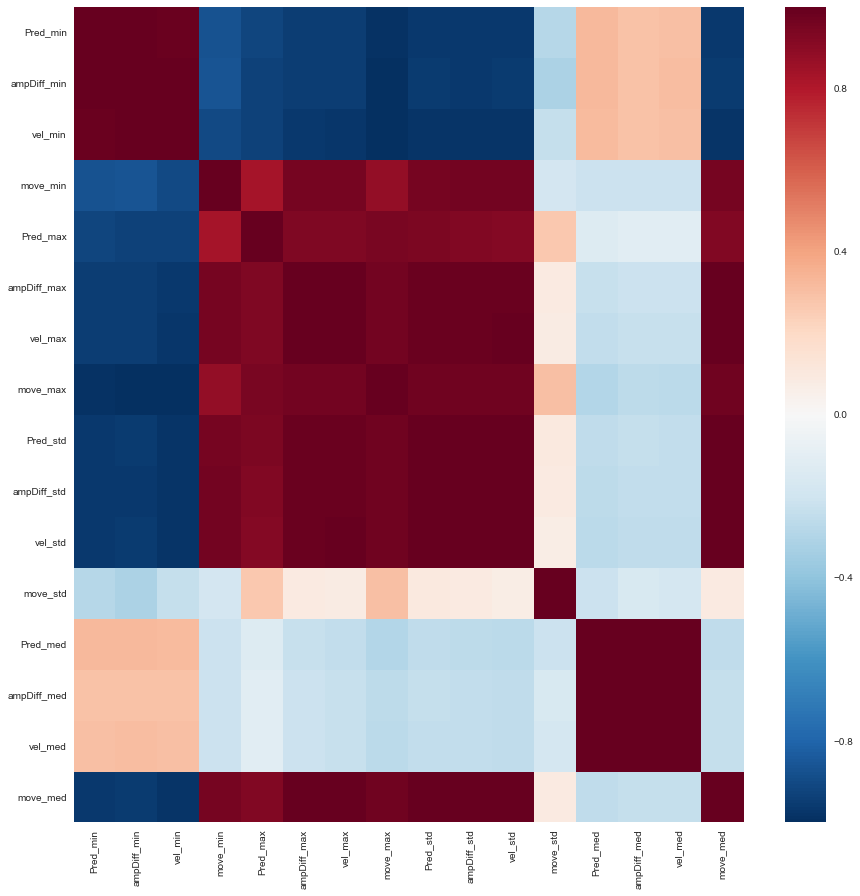

In [17]:
f, ax = pl.subplots(figsize=(15, 15))
heatmap(tides_sc_corr, ax=ax)

In [13]:
pcadata = pca.fit_transform(tides_sc)
dfpca = pd.DataFrame(pcadata[:,:5], columns=['PC%d' % i for i in range(1, 6)])